# Gradient descent

Gradient descent is a method of finding a minimum of a function.
It does so by "moving" in direction of descent specified by a derivative in the given point.

Given a start point the method iteratively searches for the point that corresponds to the minimum of the function, hopefully global.
On every iteration, we check for the gradient of the function on the current step and comupute what next point  should we check to be the minimum of the function.

$$
    x_{\mathrm{next}} = x - \alpha f'(x) 
$$

**Sloppy explanation** Given a point $x$, we check the value of the derivative of the function $f$ in point $x$. This gives us a direction to choose next point $x_\mathrm{next}$ such that we expect $f(x_\mathrm{next})$ to be smaller. We choose $x_\mathrm{next}$ based on where we are right now $x$, direction and magnitude of descent $f'(x)$ and a step $\alpha$.

$\alpha$ parameter regulates the size of the step.
We multiple alpha by the value of the derivative in the given point.
The derivative in a point tells us how steep in the curve at the point.

**Question**: Why do we need $\alpha$?

It seems that without $\alpha$ the value of the gradient is too big and we overshoot the minimum and diverge :confused:

**Question**: Why can't we just set alpha and only use the sign of the derivative? Since we just need to know in which direction to move?

In this case, we succeded only if we get the step correctly. In the example below, the only value for $\alpha$ that works in this case is $\alpha = 0.5$, since we start at $-2.0$. In all other cases, how ever small they are we are most likely to never reach the minimum.

**Question**: Why should $\alpha \in (0,1)$?

If $\alpha >= 1$ the process diverges (in case of symmetric quadratic function) and we can't reach minimum ever.

### Simple 1D example

In this example, we select $f = x^2$ and the respective jacobian is $J=f'(x) = 2x$.
$$
    x_{\mathrm{next}} = x - \alpha * 2x 
$$


The piece of code below checks different setups for the computation of the step:
* 1) Just using the sign of the derivative and skipping the magnitude + the parameter $\alpha$, also called the **learning rate**.
    * Works, if $\alpha$ is chosen correctly. The step is not adaptable. Can stuck bumping from one side of  the curve to another 
* 2) Using the value of the derivative + $\alpha$.
    * Works.
* 3) Using the value of the derivative only.
    * Step is too big. Always overshoots. At least in this example.
    


In [ ]:
import numpy as np

def f_1D(x):
    return np.power(x,2);

def jacobian(x):
    ## jacobians for x^2
    return 2*x;

alpha = 0.1;
error = 1000;
x_prev = -2.0;
opt_way = []
numOfIter =0;
while error >1e-05: 
    # 1) just using sign of the derivative
#     x_opt = x_prev - alpha *np.sign(jacobian(x_prev)); 
    # 2)using value of the derivative and step
    x_opt = x_prev - alpha *jacobian(x_prev); 
    # 3) just using derivatives have huge steps that overshoot minimum
#     x_opt = x_prev - jacobian(x_prev);
    print("Step is: ",jacobian(x_prev))
    error  = abs(x_prev -x_opt);
    x_prev = x_opt;
    opt_way.append(x_opt)
    numOfIter+=1;
print("Converged with ", numOfIter, "iterations\n")

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-2.0,2.0,0.1)

plt.figure(1)
plt.plot(x,f_1D(x))
y = np.zeros((len(opt_way),1))
plt.plot(opt_way,y, 'r*')
plt.plot(opt_way, f_1D(opt_way), 'g*-')

plt.show()

## Two dimensional case

Just checking here that the same thoughts apply to the 2D case. For the 2D case, the formulas stay the same, but now we are going to work with vectors

$$
    p_{\mathrm{next}} = p - \alpha f'(p) 
$$

where $p$ is a 2D point consisting of $(x,y)$ coordinate. In the example below, we will look at the function $f = x^2 + y^2$, so the derivative will have a different form.
$$
    \begin{bmatrix}
    x \\y
    \end{bmatrix}_{\mathrm{next}} =  \begin{bmatrix} x \\y \end{bmatrix} - \alpha \begin{bmatrix} 2x \\2y \end{bmatrix}
$$

In [ ]:
# Function: x^2 + y^2
def f(x,y):
    return np.square(x) + np.square(y);

def jacobian(x,y):
    return np.array([2*x, 2*y])



alpha = 0.1;
error = 1000;
x_prev = [-4.0, 4.0];
opt_way = []
opt_way.append(x_prev)
numOfIter =0;
while error >1e-05:
#     print("Step is: ", alpha *jacobian(x_prev))
#     x_opt = x_prev - alpha *np.sign(jacobian(x_prev)); # just using sign of the derivative
    x_opt = x_prev - alpha *jacobian(x_prev[0], x_prev[1]); # using value of the derivative
    error  = np.linalg.norm(x_prev -x_opt);
    x_prev = x_opt;
    opt_way.append(x_opt)
    numOfIter+=1;
print("Converged with ", numOfIter, "iterations\n")
opt_way = np.array(opt_way)
# print(opt_way)

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

fig = plt.figure(2,figsize=(8,6))
ax = fig.gca(projection='3d')

x, y = np.meshgrid(np.linspace(-4.0, 4.0, 20), np.linspace(-4.0, 4.0, 20))
ax.plot_surface(x, y, f(x,y), cmap=cm.coolwarm, alpha=0.5)
ax.plot(opt_way[:,0], opt_way[:,1], f(opt_way[:,0], opt_way[:,1]), '*-',color='#495165')

plt.show()

## Gradient descent for linear regression task

Linear regression is a task of finding/learning the parameters of the line that fits the given set of points the best.


The line is defined as $y = mx+b$. 
The parameters we want to find/learn are: $m$ and $b$.
We are given a set of 2D points $(x_i, y_i)$. Here the natural question arises ...

**What does this has to do with gradient descent???**

In this task, what we want to optimize is the "function" ($f$) of **distances from the points to the line**, such that our line fits the points.
So, in this case we don't have an explicit definition of $f$ through $(x,y)$ but rather through all pairs $(x_i, y_i)$. Also, we want to find the parameters of the line or such a 2D point $(m,b)$ that minimizes the error function $f$, which in this case is defined through bunch of points as

$$f = \sum (y_i - (mx_i+b))^2$$
and the respective gradients are:
$$f'_m = 2\sum (y_i - (mx_i+b))* (-x_i)$$
$$f'_b = 2\sum (y_i - (mx_i+b))* (-1)$$

So, applying the formulas for 2D gradient descent we can find the *next* values for $(m,b)$ that would lead us closer to the minimum of function $f$.

$$
    \begin{bmatrix}
    m \\b
    \end{bmatrix}_{\mathrm{next}} =  \begin{bmatrix} m \\b \end{bmatrix} - \alpha \begin{bmatrix} 2\sum (y_i - (mx_i+b))* (-x_i) \\ 2\sum (y_i - (mx_i+b))* (-1) \end{bmatrix}
$$
Let's check a synthetic example to see if the above 2D gradient definition gives us what we want.

In [84]:
import numpy as np

def errorFunction_F(x, y, m, b):
    # Error function. This function will be used for plotting only   
    y_exp = m * x + b;
    value = np.sum(np.square(y - y_exp))
    return value

def Jacobian(x, y, m, b):
    y_exp = m * x + b;
    J_m = 2 * np.sum(np.multiply(y - y_exp, -x));
    J_b = -2 * np.sum(y - y_exp);
    return np.array([J_m, J_b])


def optimizeGradientDescent(p_prev, p_x, p_y, alpha=0.1):
    error_delta = 1000; # difference between the values of the error function
    opt_way = [];
    opt_way.append(p_prev)
    numOfIter = 0;
    while (error_delta >1e-04):
        step =  -alpha *Jacobian(p_x, p_y, p_prev[0], p_prev[1])
        # alternative checking with just considering the sign of the derivative. Works, but requires 
        # tooo many iterations
        # step = - alpha *np.sign(Jacobian(p_x, p_y, p_prev[0], p_prev[1])); 
        p_opt = p_prev + step;
        
        error_before = errorFunction_F(p_x, p_y, p_prev[0], p_prev[1])
        error_after = errorFunction_F(p_x, p_y, p_opt[0], p_opt[1])
        error_delta = np.fabs(error_after - error_before)

        p_prev = p_opt;
        opt_way.append(p_opt)
        
#         print("Params delta", params_delta, " Error delta ", error_delta)
        numOfIter+=1;

    print("Gradient descent converged with ", numOfIter, "iterations\n")
    opt_way = np.array(opt_way)
    return opt_way


In [85]:
# Small unit tests to check the Jacobians
x = np.array([1,2])
y = np.array([1,2])
m = 1
b = 1

v = errorFunction_F(x, y, m, b)
print("Expected F value is 2, actual value is ", v)
[J_m, J_b] = Jacobian(x, y, m, b)
print("Expected J_m value is 6, actual value is ", J_m)
print("Expected J_b value is 4, actual value is ", J_b)


Expected F value is 2, actual value is  2
Expected J_m value is 6, actual value is  6
Expected J_b value is 4, actual value is  4


In [86]:
## function for plotting the results
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
import matplotlib.pyplot as plt

def plotErrorConvergence(axis, x, y, opt_way):
    ## plotting whole error function F
    border = 5
    m, b = np.meshgrid(np.linspace(np.min(-border), np.max(border), 20), np.linspace(np.min(-border),np.max(border), 20))
    F_values  = np.zeros(m.shape)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):   
            F_values[i][j] = errorFunction_F(x, y, m[i][j], b[i][j])
    
    axis.plot_surface(m, b, F_values, cmap=cm.coolwarm, alpha=0.5)

    ## plotting optimization steps
    opt_F_values = np.zeros(opt_way.shape[0])
    for i in range(opt_way.shape[0]):
        opt_F_values[i] = errorFunction_F(x, y, opt_way[i,0], opt_way[i,1])

    axis.plot(opt_way[:,0], opt_way[:,1], opt_F_values, '*-',color='#495165')
    plt.xlabel('m')
    plt.ylabel('b')
    return

def plotFitting(axis, m, b, x, y):
    axis.plot(x, y, '.', color='#495165') # plotting data points
    x_plot = np.linspace(np.min(p_x), np.max(p_x), 20)
    y_plot = m * x_plot + b;
    axis.plot(x_plot, y_plot, '-', color='#ff336b')
    return



Gradient descent converged with  1239 iterations

[[-4.         -4.        ]
 [-0.48119277 -3.33350152]
 [ 0.8046048  -3.08414302]
 [ 1.27378159 -2.98735005]
 [ 1.44431861 -2.94636627]]


<IPython.core.display.Javascript object>


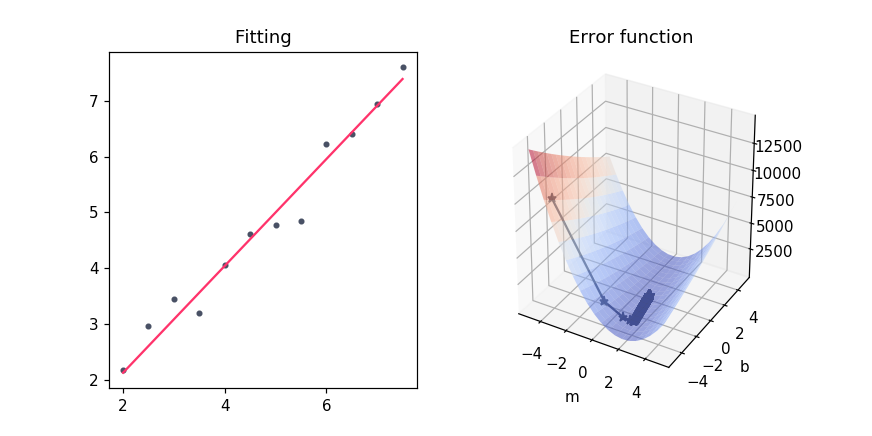

In [83]:
# # ## first let's generate some data 
m_gt = 1 # m - ground truth
b_gt = 0 # b - ground truth
sigma = 0.3 # gaussian noise

p_x = np.arange(2, 8, 0.5)
p_y = m_gt* p_x + b_gt + sigma * np.random.randn(p_x.shape[0])

# # some synthetic data
# p_x = np.array([2, 2.3, 3.1, 5, 5, 6.8, 7.1])
# p_y = np.array([2, 4.2, 3,  2, 4.5, 4., 6])


# let's check that generated data
# initial start point for (m_0, b_0)
p_prev = np.array([-4,-4])
opt_way = optimizeGradientDescent(p_prev, p_x, p_y, alpha = 0.001)
print(opt_way[0:5, 0:5])

fig = plt.figure(figsize=(8,4))
ax_left = plt.subplot(1, 2, 1)
ax_right = plt.subplot(122, projection='3d')
plotErrorConvergence(ax_right, p_x, p_y, opt_way);
ax_right.title.set_text("Error function")

plotFitting(ax_left, opt_way[-1,0], opt_way[-1,1], p_x, p_y);
ax_left.title.set_text("Fitting")

plt.show()

## Line fitting using Newton's method
Here I am going to search for the minimum using Newton's method. It is an "upgrade" for the Gradient Descent that focuses on faster convergence around minimum.
In the example, above we have a lot of points in the value of the error function, we want to reduce the number of points there. Let's see if this is going to happen!

Newton's method proposes to take into account the curvature, hence Hessian $H$:
$$H = 
\begin{pmatrix}
f''_{mm}  & f''_{mb} \\
f''_{bm} & f''_{bb}
\end{pmatrix} = 
\begin{pmatrix}
    \sum 2x_i^2 & \sum 2x_i \\
    \sum 2x_i & \sum 2 
\end{pmatrix} = 2
\begin{pmatrix}
    \sum x_i^2 & \sum x_i \\
    \sum x_i & n 
\end{pmatrix}
$$
where $x_i$ are the given points.

Now, the step amount is computed differently and in comtrast to Gradient descent that required only Jacobian, here we compute a step as solution of the following system:

$$
    Hx = -J
$$
where $x$ is the searched value of step on every iteration. Just by looking at the math, we can say that Newton's method require more advanced computations than gradient descent method.

For a little bit more math, please check this notebook [Least squares](https://nbviewer.jupyter.org/github/niosus/notebooks/blob/master/least_squares.ipynb) from [niosus](https://github.com/niosus).

Newton's converged with  2 iterations



<IPython.core.display.Javascript object>


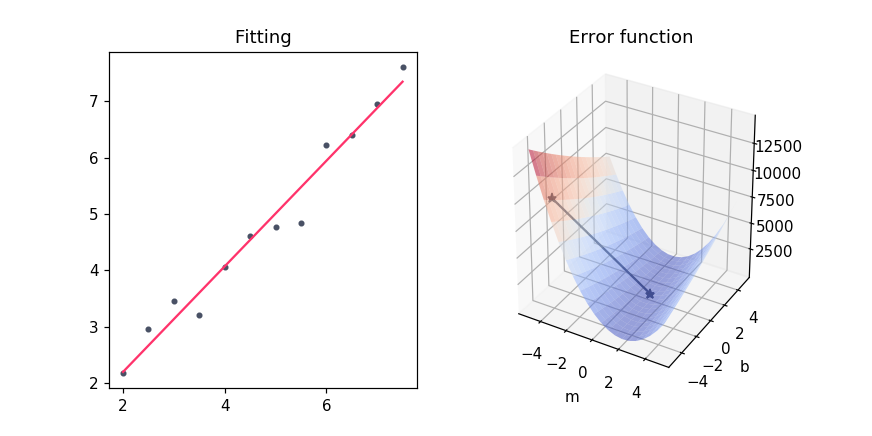

In [87]:
def Hessian(x):
    n = x.shape[0];
    H = np.zeros((2,2));
    H[0][0] = np.sum(np.power(x,2));
    H[0][1] = np.sum(x);
    H[1][0] = H[0][1];
    H[1][1] = n
    return 2*H;


def optimizeNewton(p_prev, p_x, p_y, alpha):
    error_delta = 1000;
    opt_way = [];
    opt_way.append(p_prev)
    numOfIter = 0;

    while (error_delta >1e-04):
        J = Jacobian(p_x, p_y, p_prev[0], p_prev[1]);
        H = Hessian(p_x);
        # finding step by solving Hh = -J
        step = np.linalg.solve(H,-J)
        p_opt = p_prev + step; 
       
        error_before = errorFunction_F(p_x, p_y, p_prev[0], p_prev[1])
        error_after = errorFunction_F(p_x, p_y, p_opt[0], p_opt[1])
        error_delta = np.fabs(error_after - error_before)

        p_prev = p_opt;
        opt_way.append(p_opt)
        numOfIter+=1;

    print("Newton's converged with ", numOfIter, "iterations\n")
    opt_way = np.array(opt_way)
    return opt_way

p_prev = np.array([-4,-4])
alpha = 0.005
opt_newton = optimizeNewton(p_prev, p_x, p_y, alpha)

fig = plt.figure(figsize=(8,4))
ax_left = plt.subplot(1, 2, 1)
ax_right = plt.subplot(122, projection='3d')
plotErrorConvergence(ax_right, p_x, p_y, opt_newton);
ax_right.title.set_text("Error function")

plotFitting(ax_left, opt_newton[-1,0], opt_newton[-1,1], p_x, p_y);
ax_left.title.set_text("Fitting")

plt.show()


## Gradient descent vs Newton
Here we compare the results of Gradient Descent and Newton's method for the case of fitting a 2D line into the set of given points


In [91]:
# different data to check 
m_gt = 1 # m - ground truth
b_gt = 0 # b - ground truth
sigma = 0.5 # gaussian noise
alpha = 0.001

p_x = np.arange(2, 8, 0.5)
p_y = m_gt* p_x + b_gt + sigma * np.random.randn(p_x.shape[0])

start_params = np.array([-4,-4]); # setting start values for m and b
opt_gradient = optimizeGradientDescent(start_params, p_x, p_y, alpha);
opt_newton = optimizeNewton(start_params, p_x, p_y, alpha);
print("Gradient descent parameters for m and b", opt_gradient[-1,:])
print("Newton's parameters for m and b", opt_newton[-1,:])

Gradient descent converged with  1207 iterations

Newton's converged with  2 iterations

Gradient descent parameters for m and b [ 1.02828109 -0.05871209]
Newton's parameters for m and b [1.00686901 0.05591663]


<IPython.core.display.Javascript object>


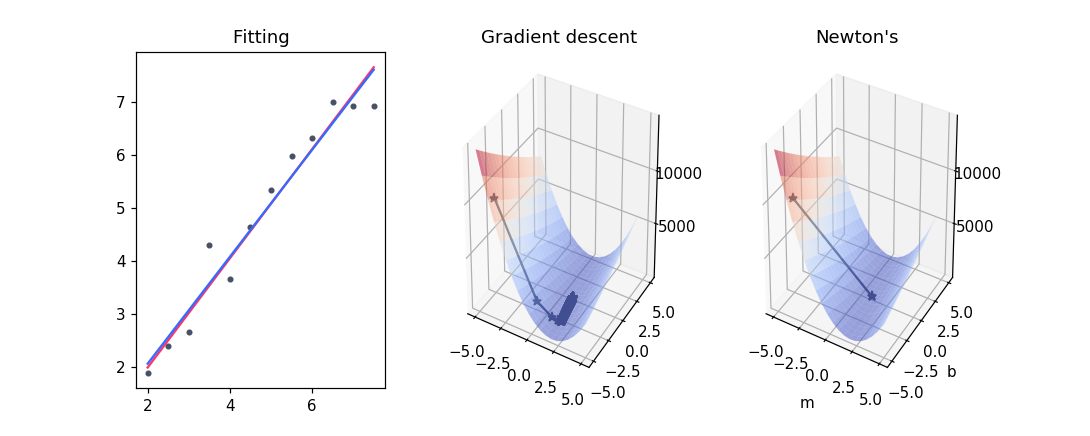

In [92]:
fig = plt.figure(figsize=(10,4))
ax_left = plt.subplot(131)
ax_middle = plt.subplot(132, projection='3d')
ax_right = plt.subplot(133, projection='3d')

plotErrorConvergence(ax_middle, p_x, p_y, opt_gradient);
ax_middle.title.set_text("Gradient descent")

plotErrorConvergence(ax_right, p_x, p_y, opt_newton);
ax_right.title.set_text("Newton's")

plotFitting(ax_left, opt_gradient[-1,0], opt_gradient[-1,1], p_x, p_y);
x_plot = np.linspace(np.min(p_x), np.max(p_x), 20)
y_plot = opt_newton[-1,0] * x_plot + opt_newton[-1,1];
ax_left.plot(x_plot, y_plot, '-', color='#336bff')
ax_left.title.set_text("Fitting")

plt.show()

## Stochastic gradient descent and mini-batch gradient descent

My understanding of the stochastic gradient descent is that instead of using all the points for every iteration step, our gradient descent uses just one point to find the next estimate towards the minimum.
Thus, the regression task can be written as

$$
    \begin{bmatrix}
    m \\b
    \end{bmatrix}_{\mathrm{next}} =  \begin{bmatrix} m \\b \end{bmatrix} - \alpha \begin{bmatrix} 2(y_i - (mx_i+b))* (-x_i) \\ 2(y_i - (mx_i+b))* (-1) \end{bmatrix}
$$

TODO: continue here



### Summary
It seems that Newton's method converges faster for this case than gradient descent method.
Newton's method, however, involves computing explicitly second partial derivatives, i.e. Hessian.
This can be computationally demanding if we have a lot of parameters to minimize for.